In [1]:
import sys
sys.path.append('/scratch/pradap/python-work/enrique/')

In [2]:
import magellan as mg

In [3]:
mg.init_jvm()

True

In [4]:
A = mg.load_dataset('table_A')
B = mg.load_dataset('table_B')

In [5]:
ab = mg.AttrEquivalenceBlocker()
C = ab.block_tables(A, B, 'zipcode', 'zipcode', 'name', 'name')

In [6]:
S = mg.sample_table(C, 10)

In [7]:
S

,_id,ltable.ID,rtable.ID,ltable.name,rtable.name
2,2,a1,b6,Kevin Smith,Michael Brodie
6,6,a2,b3,Michael Franklin,Mike Franklin
7,7,a2,b4,Michael Franklin,Joseph Kuan
8,8,a2,b5,Michael Franklin,Alfons Kemper
9,9,a4,b3,Binto George,Mike Franklin
10,10,a4,b4,Binto George,Joseph Kuan
11,11,a4,b5,Binto George,Alfons Kemper
12,12,a5,b3,Alphonse Kemper,Mike Franklin
13,13,a5,b4,Alphonse Kemper,Joseph Kuan
14,14,a5,b5,Alphonse Kemper,Alfons Kemper


In [8]:
#L = mg.label_table(S, 'gold')

In [9]:
L = mg.read_csv('label_test.csv', ltable=A, rtable=B)

In [10]:
feature_table = mg.get_features_for_matching(A, B)

In [11]:
f = feature_table.ix[[10]]

In [12]:
dt = mg.DTMatcher(random_state=100)
rf = mg.RFMatcher(random_state=100)
svm = mg.SVMMatcher(random_state=100)

In [13]:
G = mg.extract_feat_vecs(L, feat_table=f, attrs_after='gold')

In [14]:
G

,_id,ltable.ID,rtable.ID,name_name_lev,gold
0,0,a1,b1,0.000000,1
1,1,a1,b6,0.071429,0
2,2,a3,b1,0.142857,0
3,3,a3,b6,0.428571,0
4,4,a2,b3,0.750000,1
5,5,a4,b3,0.076923,1
6,6,a4,b4,0.000000,0
7,7,a4,b5,0.153846,0
8,8,a5,b3,0.000000,1
9,9,a5,b4,0.200000,0


In [15]:
res = mg.select_matcher([dt, rf, svm], table=G, exclude_attrs=['_id', 'rtable.ID', 'ltable.ID', 'gold'], 
                        target_attr='gold', metric='precision')

/scratch/pradap/local/share/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
res['cv_stats']

,Name,Matcher,Num folds,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean score
0,DecisionTree_80604761178661795441,<magellan.matcher.dtmatcher.DTMatcher object a...,5,0,0,0,0,0,0
1,RandomForest_82509571178661795441,<magellan.matcher.rfmatcher.RFMatcher object a...,5,0,0,0,0,0,0
2,SVM_42411381178661795441,<magellan.matcher.svmmatcher.SVMMatcher object...,5,0,0,0,0,0,0


In [17]:
help(mg.vis_debug_dt)

Help on function vis_debug_dt in module magellan.debugmatcher.debug_gui_decisiontree_matcher:

vis_debug_dt(matcher, train, test, exclude_attrs, target_attr)



In [18]:
train_test = mg.train_test_split(G, train_proportion=0.6)

In [19]:
train_test['train']

,_id,ltable.ID,rtable.ID,name_name_lev,gold
5,5,a4,b3,0.076923,1
8,8,a5,b3,0.000000,1
7,7,a4,b5,0.153846,0
2,2,a3,b1,0.142857,0
3,3,a3,b6,0.428571,0
6,6,a4,b4,0.000000,0


In [20]:
dt.fit(table=train_test['train'], exclude_attrs=['_id', 'rtable.ID', 'ltable.ID', 'gold'], target_attr=['gold'])

In [21]:
train_test['test']

,_id,ltable.ID,rtable.ID,name_name_lev,gold
0,0,a1,b1,0.000000,1
9,9,a5,b4,0.200000,0
1,1,a1,b6,0.071429,0
4,4,a2,b3,0.750000,1


In [22]:
P = dt.predict(table=train_test['test'], exclude_attrs=['_id', 'rtable.ID', 'ltable.ID', 'gold'], target_attr='predicted',
              append=True, inplace=False)

In [23]:
P

,_id,ltable.ID,rtable.ID,name_name_lev,gold,predicted
0,0,a1,b1,0.000000,1,0
1,9,a5,b4,0.200000,0,0
2,1,a1,b6,0.071429,0,1
3,4,a2,b3,0.750000,1,0


In [33]:
mg.visualize_tree(dt, G.columns, exclude_attrs = ['_id', 'rtable.ID', 'ltable.ID', 'gold'])

Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 


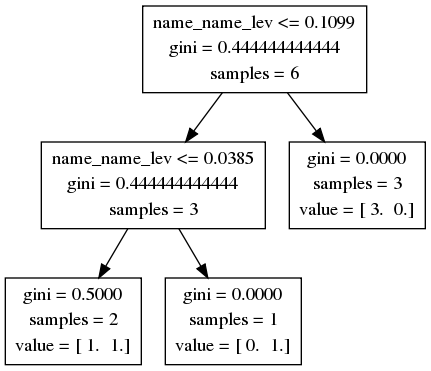

In [34]:
from IPython.display import Image
Image(filename='dt_.png') 

In [24]:
mg.eval_matches(P, 'gold', 'predicted')

OrderedDict([('prec_numerator', 0.0),
             ('prec_denominator', 1.0),
             ('precision', 0.0),
             ('recall_numerator', 0.0),
             ('recall_denominator', 2.0),
             ('recall', 0.0),
             ('f1', 0.0),
             ('pred_pos_num', 1.0),
             ('false_pos_num', 1.0),
             ('false_pos_ls', [('a1', 'b6')]),
             ('pred_neg_num', 3.0),
             ('false_neg_num', 2.0),
             ('false_neg_ls', [('a1', 'b1'), ('a2', 'b3')])])

In [25]:
t = train_test['train']

In [26]:
import pandas as pd

In [27]:
g = t[['gold']]

In [28]:
g.T.iloc[0]

5    1
8    1
7    0
2    0
3    0
6    0
Name: gold, dtype: int64

In [29]:
type(g.T.iloc[0])

pandas.core.series.Series

In [30]:
mg.vis_debug_dt(dt, train_test['train'], train_test['test'], exclude_attrs=['_id', 'rtable.ID', 'ltable.ID', 'gold'], target_attr=['gold'])

   _id ltable.ID rtable.ID  name_name_lev  gold  _predicted
0    0        a1        b1       0.000000     1           0
1    9        a5        b4       0.200000     0           0
2    1        a1        b6       0.071429     0           1
3    4        a2        b3       0.750000     1           0
OrderedDict([('prec_numerator', 0.0), ('prec_denominator', 1.0), ('precision', 0.0), ('recall_numerator', 0.0), ('recall_denominator', 2.0), ('recall', 0.0), ('f1', 0.0), ('pred_pos_num', 1.0), ('false_pos_num', 1.0), ('false_pos_ls', [('a1', 'b6')]), ('pred_neg_num', 3.0), ('false_neg_num', 2.0), ('false_neg_ls', [('a1', 'b1'), ('a2', 'b3')])])
_id                int64
ltable.ID         object
rtable.ID         object
name_name_lev    float64
gold               int64
_predicted         int64
dtype: object
Debug button clicked : 0
OrderedDict([('name_name_lev', 0.071428571428571397), ('_predicted', 1)])
Show button clicked : 0
False Negatives
Show button clicked : 0
Show button clicked : 1
D